In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import random
import numpy as np

### Histogram

In [25]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Let's again plot the histogram of the flipper length: 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

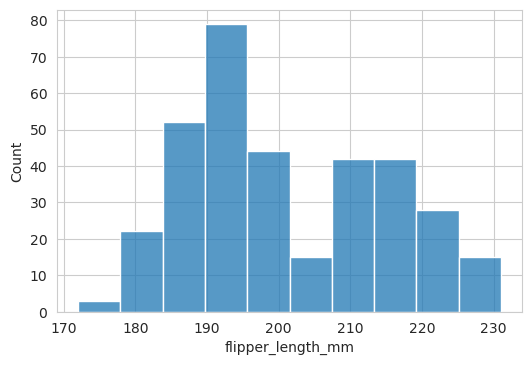

In [26]:
sns.histplot(data=penguins, x="flipper_length_mm")

How about using more bins? Is it still as useful as before?

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

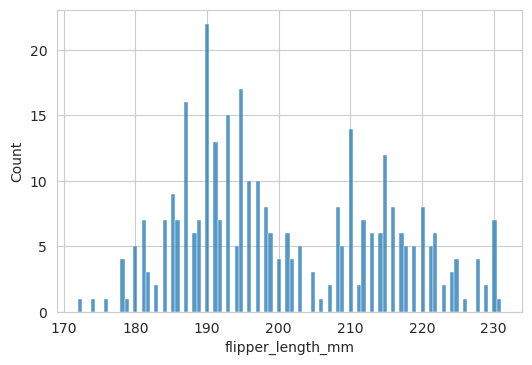

In [27]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=100)

Or perhaps a few bins

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

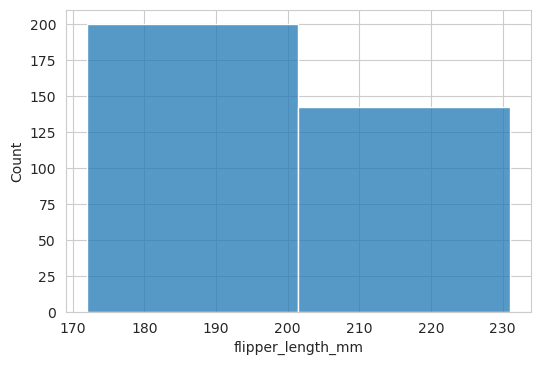

In [28]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=2)

So what is best number of the bins? Let's intuitively figure it out.

Let's generate some samples from the uniform distribution using numpy package:

<AxesSubplot:ylabel='Count'>

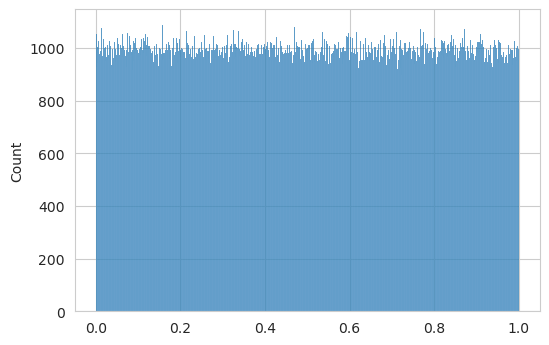

In [29]:
# play with the number of points and the number of bins in the histogram

x = np.random.rand(1000000)
sns.histplot(x, bins=1000)

### Kernel Density Estimation (KDE):

A normal (Gaussian) distribution (we'll learn exactly what it means...) with mean $\mu$ and standard deviation $\sigma$ has a density
$$
    p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}.
$$

This will be our _kernel_!

In [30]:
# Gaussian kernel
def std_gauss(t):
    return np.exp(-t**2 / 2) / np.sqrt(np.pi * 2)

The Gaussian kernel looks like:

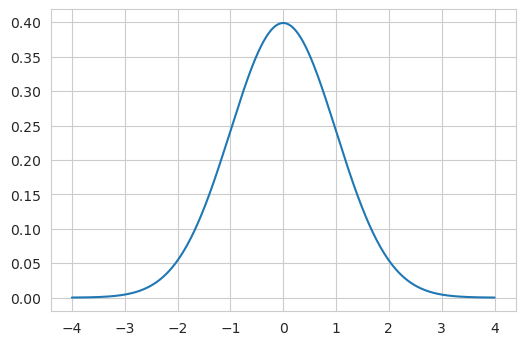

In [31]:
t = np.linspace(-4, 4, 1000)
plt.plot(t, std_gauss(t))

Let's consider only 5 points and sketch the scatter plot:

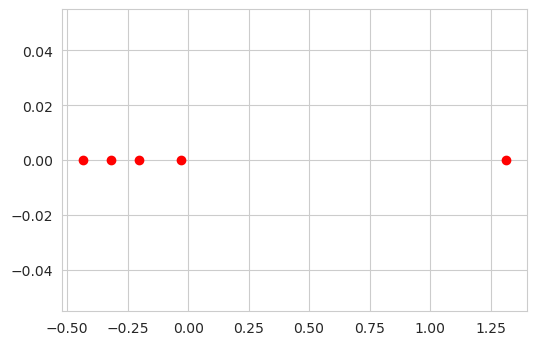

In [32]:
n_points = 5
sig = 0.1

dat = np.random.randn(n_points)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(dat, 0*dat, color='r')


Now let's define the KDE function to consider a Gaussian around each point:

In [33]:
def mykde(data, t, sig):
    kd = np.zeros((len(data), len(t)))
    for i, x in enumerate(data):
        kd[i] = std_gauss((t - x) / sig) / sig

    return kd / len(data)

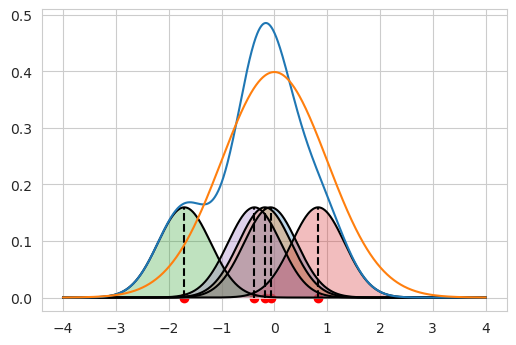

In [34]:
n_points = 5
sig = 0.5

dat = np.random.randn(n_points)
bumps = mykde(dat, t, sig)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(dat, 0*dat, color='r')
_ = ax.plot(t, bumps.T, "k")
ax.plot(t, bumps.sum(axis=0)) # the kde plot (blue curve)
for i in range(n_points):
    ax.fill_between(t, 0, bumps[i, :], alpha=0.3)
ax.vlines(dat, 0, 1/np.sqrt(2*np.pi)/sig/n_points, 'k', linestyles='dashed')

ax.plot(t, std_gauss(t)) # The true distribution (orange curve)

Now let's generate more data and decrease the standard deviation of the kernel (sigma) to fit it better:

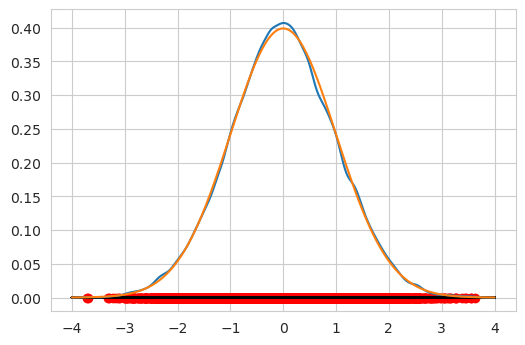

In [35]:
n_points = 10000
sig = 0.1

dat = np.random.randn(n_points)
bumps = mykde(dat, t, sig)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(dat, 0*dat, color='r')
_ = ax.plot(t, bumps.T, "k")
ax.plot(t, bumps.sum(axis=0)) # the kde plot (blue curve)
for i in range(n_points):
    ax.fill_between(t, 0, bumps[i, :], alpha=0.3)
ax.vlines(dat, 0, 1/np.sqrt(2*np.pi)/sig/n_points, 'k', linestyles='dashed')

ax.plot(t, std_gauss(t)) # The true distribution (orange curve)